In [2]:
import json
import pickle

path = 'GameStateFromENV.json'
with open(path, 'r') as f:
    data = json.load(f)
with open('BeliefEmbeddings.json','r') as f:
    data2 = json.load(f)
# 格式化打印
# print(json.dumps(data, indent=2))

In [3]:
file_path = '10-003.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)
print(data)

[{'player_hands': [[(1, 3), (3, 3), (3, 2), (2, 3)], [(0, 1), (3, 3), (2, 0), (2, 3), (2, 0)]], 'observed_hands': [[(-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(0, 1), (3, 3), (2, 0), (2, 3), (2, 0)]], 'observed_hands_1': [[(-1, -1), (-1, -1), (-1, -1), (-1, -1), (-1, -1)], [(1, 3), (3, 3), (3, 2), (2, 3)]], 'possible_num_and_color_0': [([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4])], 'possible_num_and_color_1': [([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4]), ([0, 1, 2, 3], [0, 1, 2, 3, 4])], 'action': '(Play 4)', 'discard_pile': 

In [4]:
def explore_structure(obj, level=0):
    indent = "  " * level
    if isinstance(obj, dict):
        print(f"{indent}Dict with keys:")
        for key, value in obj.items():
            print(f"{indent}- {key} ({type(value).__name__})")
            explore_structure(value, level + 1)
    elif isinstance(obj, list):
        print(f"{indent}List with {len(obj)} items:")
        if obj:  # 打印第一个元素作为样例
            explore_structure(obj[0], level + 1)

# 使用示例
explore_structure(data)
print("-------")
explore_structure(data2)

List with 15 items:
  Dict with keys:
  - player_hands (list)
    List with 2 items:
      List with 4 items:
  - observed_hands (list)
    List with 2 items:
      List with 4 items:
  - observed_hands_1 (list)
    List with 2 items:
      List with 5 items:
  - possible_num_and_color_0 (list)
    List with 9 items:
  - possible_num_and_color_1 (list)
    List with 9 items:
  - action (str)
  - discard_pile (list)
    List with 0 items:
  - deck_size (int)
  - fireworks (list)
    List with 4 items:
  - life_tokens (int)
  - score (int)
  - belief_embedding (list)
    List with 2 items:
      List with 128 items:
  - intention (list)
    List with 5 items:
-------
List with 100 items:
  List with 5 items:
    Dict with keys:
    - player_hands (list)
      List with 2 items:
        List with 5 items:
          List with 2 items:
    - observed_hands (list)
      List with 2 items:
        List with 5 items:
          List with 2 items:
    - action (str)
    - discard_pile (list)
   

In [5]:

color_map = {
    0:'red',
    1:'purple',
    2:'blue',
    3:'yellow',
    4:'green',
}
colors = [v[1] for v in color_map.items()]
strandard_form_data = []
def tran_hand(a,b):
    color,num = color_map[a], b+1
    
    return {
        'type': 'normal',
        'color': color,
        'number': num,
        }
def tran_hand2(col_list, num_list ): # for possible matrix
    color = 'red' #可以随便填
    num = 1 #可以随笔填
    possibleNumbers = [x+1 for x in num_list]
    possibleColors = [color_map[x] for x in col_list]
    
    
    return {
        'type': 'roulette',
        'color': color,
        'number': num,
        'possibleColors':possibleColors,
        'possibleNumbers':possibleNumbers,
        
        }
# print(data)
for round in data:
    temp = {}
    temp['pile_state'] = {}
    # temp['pile_state'] = {s: 0 for s in colors}
    for s in colors:
        temp['pile_state'][s] = 0
        
    temp['hand_cards'] = []
    # print(round)
    hands = round["player_hands"]
    pm = [round["possible_num_and_color_0"],round["possible_num_and_color_1"]]
    for i in range(len(hands)): # players
        h = []
        for j in range(len(hands[i])): # cards
            # print(*hands[i][j])
            if len(hands[i][j])>2:continue
            h.append(tran_hand(*hands[i][j]))
        for j in range(len(hands[i])):
            if len(pm[i][j])>2:continue
            h.append(tran_hand2(*pm[i][j]))
        
        temp['hand_cards'].append(h)
        
    temp['score']        = round['score']
    temp['deck_size']    = round['deck_size']
    temp['life_tokens']  = round['life_tokens']
    temp['action']       = round["action"]
    temp['discard_pile'] = []
    # temp['hints']        = round['hints']  ###TODO###补充一下round['hints']
    for card in round["discard_pile"]:
        if len(card) > 2:continue
        temp['discard_pile'].append(tran_hand(*card))
        
    print(temp['action'])
    for x in range(4):
        # print(round['fireworks'][x])
        #print(color_map[x])
        temp['pile_state'][color_map[x]] = round['fireworks'][x]
    
    strandard_form_data.append(temp)
#print(strandard_form_data)
with open("VISdata.json", "w") as f:
    json.dump(strandard_form_data, f)

    
    
        
    
                
    
    
    

(Play 4)
(Play 2)
(Play 4)
(Play 4)
(Play 4)
(Play 4)
(Play 3)
(Play 4)
(Play 4)
(Play 4)
(Play 2)
(Play 2)
(Reveal player +1 rank 5)
(Discard 3)
(Play 3)


In [65]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
b1s = []
b2s = []
bs = []
actions = []

def type_of_action(a):
    if 'Discard' in a:
        return 0
    elif 'Play' in a:
        return 1
    elif 'Reveal' in a :
        return 2
for data in data2:
    for round in data:
        if round["score"]<1:
            continue
        belief1 = np.array(round['belief_embedding'][0])
        b1s.append(belief1)
        belief2 = np.array(round['belief_embedding'][1])
        b2s.append(belief2)
        bs.append(belief1)
        bs.append(belief2)
        print(round['action'])
        if 'action' in round:
            actions.append(type_of_action(round['action']))
        
b_emb1 = np.array(b1s)
b_emb2 = np.array(b2s)
b_emb = np.array(bs)
print(b_emb.shape)
print(actions)


# mapping可以用来将数字对应到字符串
# meaning可以自己定义
mapping = {
    0:'discard',
    1:'play',
    2:"reveal"
}

def f(beliefs, actions, N_cluster, K_actions):
    """
        arg:
        belief: np array (N, d)
        actions: list with N int elenments, representing type of the action
            for example: 1->discard, 2->give a hint, 3->play a card, etc.
        N_cluster: number of cluster, can be ajusted by looking at the figure.
        K_actions: number of how many types of action we have
        return: 
        
    """
    kmeans = KMeans(n_clusters=N_cluster, random_state=42)
    labels = kmeans.fit_predict(beliefs)
    voting = [0 for i in range(K_actions)]
    counts = [voting.copy() for i in range(N_cluster)]
    meaning = [0 for i in range(N_cluster)]
    
    for i in range(len(actions)):
        counts[labels[i]][actions[i]] += 1
    for i in range(len(counts)):
        max_value = max(counts[i])
        max_index = counts[i].index(max_value)
        meaning[i] = max_index
        print(f'cluster{i}的含义是{mapping[meaning[i]]}')
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(beliefs)
    return labels, embeddings_2d
    
        
    
    
    

(Play 4)
(Reveal player +1 color R)
(Discard 0)
(Reveal player +1 color W)
(Discard 1)
(Discard 3)
(Play 1)
(Play 4)
(Play 3)
(Reveal player +1 rank 3)
(Play 4)
(Discard 3)
(Play 4)
(Play 2)
(Reveal player +1 color Y)
(Play 0)
(Reveal player +1 color R)
(Reveal player +1 color W)
(Reveal player +1 rank 4)
(Discard 0)
(Reveal player +1 color G)
(Discard 2)
(Discard 0)
(Play 4)
(Play 1)
(Reveal player +1 rank 3)
(Reveal player +1 color R)
(Play 0)
(Play 1)
(Reveal player +1 color G)
(Play 3)
(Reveal player +1 rank 4)
(Play 0)
(Play 2)
(Play 2)
(Discard 0)
(Reveal player +1 color G)
(Play 4)
(Reveal player +1 color R)
(Discard 4)
(Discard 3)
(Reveal player +1 color W)
(Reveal player +1 rank 1)
(Reveal player +1 rank 4)
(Play 4)
(Discard 4)
(Discard 1)
(Reveal player +1 color G)
(Reveal player +1 color G)
(Discard 3)
(Discard 3)
(Reveal player +1 rank 2)
(Reveal player +1 rank 1)
(Play 1)
(Reveal player +1 rank 5)
(Play 3)
(Play 0)
(Play 1)
(Play 2)
(Reveal player +1 rank 5)
(Play 1)
(Reve

cluster0的含义是reveal
cluster1的含义是discard
cluster2的含义是play
Cluster 0 corresponds to color (np.float64(0.267004), np.float64(0.004874), np.float64(0.329415), np.float64(1.0))
Cluster 1 corresponds to color (np.float64(0.190631), np.float64(0.407061), np.float64(0.556089), np.float64(1.0))
Cluster 2 corresponds to color (np.float64(0.20803), np.float64(0.718701), np.float64(0.472873), np.float64(1.0))


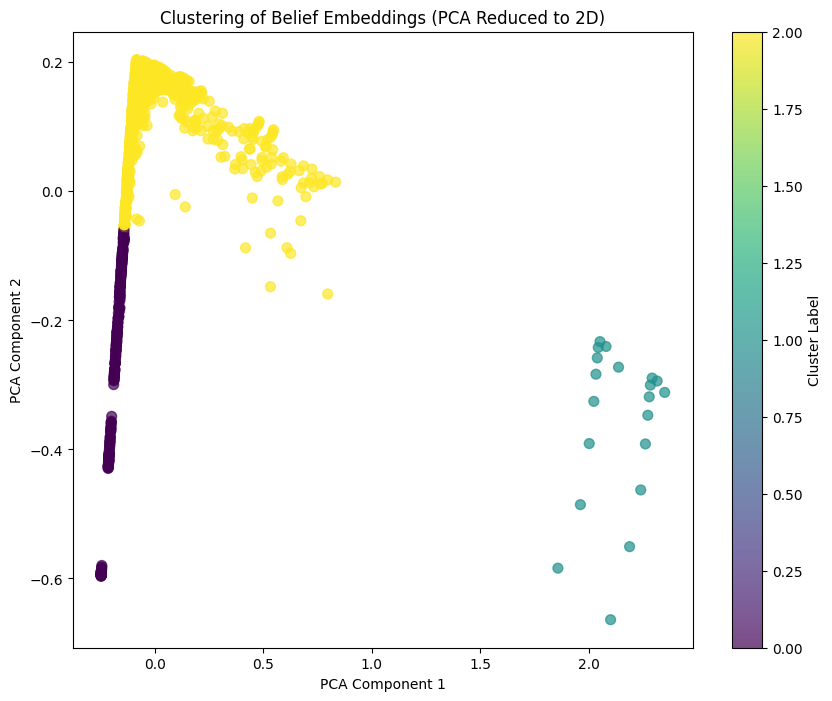

In [67]:

labels, embeddings_2d = f(b_emb, actions, 3, 3)
cmap = plt.cm.viridis

# 获取标签数目和每个标签对应的颜色
unique_labels = np.unique(labels)
colors = [cmap(i / len(unique_labels)) for i in range(len(unique_labels))]

# 打印每个标签对应的颜色
for label, color in zip(unique_labels, colors):
    print(f"Cluster {label} corresponds to color {color}")


# Step 3: 可视化 - 使用matplotlib绘制聚类结果
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title("Clustering of Belief Embeddings (PCA Reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()



# 以下程序会帮你可视化刚刚输出的颜色

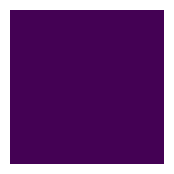

RGB Color: (np.float64(0.267004), np.float64(0.004874), np.float64(0.329415))


In [8]:
import matplotlib.pyplot as plt
import numpy as np
color = (np.float64(0.267004), np.float64(0.004874), np.float64(0.329415), np.float64(1.0))
# 将颜色显示为RGB格式
# 如果是RGBA，透明度是最后一个值。对于透明背景，可以设置alpha = 1。
rgb_color = color[:3]  # 取前三个元素（RGB）

# 可视化颜色
plt.figure(figsize=(2, 2))
plt.imshow([[(rgb_color)]])  # 使用imshow展示颜色
plt.axis('off')  # 关闭坐标轴
plt.show()

# 输出对应的颜色
print(f"RGB Color: {rgb_color}")

## Intention Distribution: Prediction vs GroundTruth


In [9]:
def plot_dist(x, p, figsize=(8, 5)):
    """
    在 Jupyter notebook 中简单地可视化离散概率分布
    
    参数:
    x: 取值列表
    p: 对应的概率列表
    figsize: 图表大小，默认 (8, 5)
    """
    plt.figure(figsize=figsize)
    # 绘制柱状图和数据点
    plt.bar(x, p, alpha=0.6)
    plt.plot(x, p, 'ro-')
    
    # 在每个点上标注概率值
    for i, prob in enumerate(p):
        plt.text(x[i], prob, f'{prob:.2f}', ha='center', va='bottom')
    
    plt.grid(True, alpha=0.3)
    plt.ylabel('Probability')
    plt.xlabel('Intention')
    plt.show()

In [12]:



for round in data:
    intention1 = round['pred_belief'][0]
    intention2 = round['intention'][0]
    
    #print(intention)
    #print(x)
    x = [i+1 for i in range(len(intention1))]
    print("pred")
    plot_dist(x, intention1)
    print("gt")
    plot_dist(x, intention2)
    
    
    
    

KeyError: 'pred_belief'

## Cumulative curve

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def select(pred, gt):
    print(pred, gt)
    x = np.array(pred)
    y = np.array(gt)
    idx_pred = np.argmax(x)
    idx_gt = np.argmax(y)
    print(idx_pred, idx_gt, idx_pred == idx_gt)
    return idx_pred == idx_gt

def plot_cumulative_score(scores, title="Cumulative correct intention predictions", figsize=(10, 6)):
    """
    绘制累积分数随时间的变化曲线
    
    参数:
    scores: list - 累积分数列表，每个元素表示对应时间点的累积分数
    title: str - 图表标题
    figsize: tuple - 图表尺寸
    """
    # 生成时间点列表（从1开始）
    time_points = list(range(1, len(scores) + 1))
    
    # 创建图表
    plt.figure(figsize=figsize)
    
    # 绘制累积曲线
    plt.plot(time_points, scores, 'b-', linewidth=2)
    
    # 添加数据点和标记
    plt.plot(time_points, scores, 'ro')
    
    # 设置坐标轴和标签
    plt.grid(True, alpha=0.3)
    plt.xlabel('Time')
    plt.ylabel('Cumulative correct intention predictions')
    plt.title(title)
    
    # 显示图表
    plt.show()


In [13]:
idx = 0
N = len(data[0])
scores = []
total = 0
rounds = [round for round in data[0]]
for i in range(len(rounds)):
    idx += 1
    if i > 0:
        total += select(rounds[i-1]["intention"], rounds[i]["pred_belief"])
    scores.append(total)

plot_cumulative_score(scores, title="Cumulative correct intention predictions")


NameError: name 'select' is not defined